### "Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px ## plotly is graphical library that makes the graph more attractive and high quality
%matplotlib inline

In [51]:
df=pd.read_csv('Travel.csv')

In [52]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


##  EDA(Exploratory Data Analysis)

In [53]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [54]:
df.describe() ## statistical representation of data

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [55]:
df.info() ## data summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

#### first i deal with numeraical features

In [56]:
df=df.drop(columns='CustomerID',axis=1) ## CustomerID is not play any role to building the model 

In [57]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [58]:
## features with null values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5) ,'%missing values')

Age 4.62357 %missing values
TypeofContact 0.51146 %missing values
DurationOfPitch 5.13502 %missing values
NumberOfFollowups 0.92062 %missing values
PreferredPropertyStar 0.53191 %missing values
NumberOfTrips 2.86416 %missing values
NumberOfChildrenVisiting 1.35025 %missing values
MonthlyIncome 4.76678 %missing values


In [59]:
## df[features_with_na].select_dtypes(exclude='object').describe()
df[features_with_na].describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## Imputing Null values
### Impute Meanvalue for Age column
### Impute Mode for Type of Contract
### Impute Median for Duration of Pitch
### Impute Mode for NumberofFollowup as it is Discrete feature
### Impute Mode for PreferredPropertyStar
### Impute Median for NumberofTrips
### Impute Mode for NumberOfChildrenVisiting
### Impute Median for MonthlyIncome

In [60]:
## replace null vlaue with mean of the age 
df['Age']=df['Age'].fillna(df['Age'].mean())

In [61]:
## replace null values with the meadian 
df['DurationOfPitch']=df['DurationOfPitch'].fillna(df['DurationOfPitch'].median())

In [62]:
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0],inplace=True)
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0],inplace=True)
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(),inplace=True)
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0],inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(),inplace=True)
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0],inplace=True)

In [63]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

## Feature Engineering

In [64]:
df['TotalNumberofVisiting']=df['NumberOfChildrenVisiting']+df['NumberOfPersonVisiting']

In [65]:
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'],axis=1,inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4888 non-null   int64  
 1   Age                     4888 non-null   float64
 2   TypeofContact           4888 non-null   object 
 3   CityTier                4888 non-null   int64  
 4   DurationOfPitch         4888 non-null   float64
 5   Occupation              4888 non-null   object 
 6   Gender                  4888 non-null   object 
 7   NumberOfFollowups       4888 non-null   float64
 8   ProductPitched          4888 non-null   object 
 9   PreferredPropertyStar   4888 non-null   float64
 10  MaritalStatus           4888 non-null   object 
 11  NumberOfTrips           4888 non-null   float64
 12  Passport                4888 non-null   int64  
 13  PitchSatisfactionScore  4888 non-null   int64  
 14  OwnCar                  4888 non-null   

In [67]:
##  number of numerical feature
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
print('No of numerical features ',len(num_features))

No of numerical features  12


In [68]:
## number of categorical features
categ_feature = [feature for feature in df.columns if df[feature].dtype=='O']
print('No of categorical features ',len(categ_feature))

No of categorical features  6


In [69]:
## discrete features 
dis_feature=[feature for feature in num_features if len(df[feature].unique())<=25]
print('No of discrete features ',len(dis_feature))

No of discrete features  9


In [70]:
## continous features
con_feature=[feature for feature in num_features if feature not in dis_feature]
print('No of continous features ',len(con_feature))

No of continous features  3


In [71]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [72]:
df['Gender'].replace('Fe Male','Female',inplace=True)

In [73]:
X=df.drop(columns='ProdTaken',axis=1)
y=df['ProdTaken']

In [74]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalNumberofVisiting
0,41.000000,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,49.000000,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,33.000000,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,37.622265,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [75]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [76]:
X_train.shape,X_test.shape

((3666, 17), (1222, 17))

## Feature Engerring Transformation of Datasets Using pipeline conceopt ColumnTransFromer 
### ColumnTransformer is a powerful tool in the scikit-learn library used for applying different preprocessing steps to different columns of a dataset. This is particularly useful when you have a mix of numerical and categorical features, and you need to apply different transformations to each.
### Basic Overview:
### Purpose: Apply different preprocessing steps to different subsets of columns.
### Common Use Cases: Handling datasets with both numerical and categorical features, combining different preprocessing techniques into a single pipeline.

### Example:
### Scale the numerical features.
### Encode the categorical features.
### One-hot encoding is a method used to convert categorical data into a binary (0 or 1) format that can be provided to machine learning algorithms to improve prediction performance. Each category is converted into a new column, and a value of 1 or 0 is assigned to indicate the presence or absence of the category in the original data.

In [77]:
num_feature=X.select_dtypes(exclude=object).columns ## Return a subset of dataframe according to the column dtypes
cat_feature=X.select_dtypes(include=object).columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numTransformer=StandardScaler()
catTransformer=OneHotEncoder(drop='first')

## parameters 
#  List of (name, transformer, columns) tuples specifying the
#  transformer objects to be applied to subsets of the data.
preprocessor= ColumnTransformer(
    [("OneHotEncoder",catTransformer,cat_feature),
    ("StandardScaler",numTransformer,num_feature)]
)

In [78]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome',
       'TotalNumberofVisiting'],
      dtype='object'))])

In [79]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [80]:
X_train.shape

(3666, 27)

In [81]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/a2/48/d5da8591891327b0faf08179d420fba3893c6134bdd449497c5329e4cb01/xgboost-2.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 1.3 MB/s eta 0:01:38
   ---------------------------------------- 0.0/124.9 MB 653.6 kB/s eta 0:03:12
   ---------------------------------------- 0.1/124.9 MB 651.6 kB/s eta 0:03:12
   ---------------------------------------- 0.1/124.9 MB 654.9 kB/s eta 0:03:11
   ---------------------------------------- 0.1/124.9 MB 708.1 kB/s eta 0:02:57
   ---------------------------------------- 0.2/124.9 MB 808.4 kB/s eta 0:02:35
   ---------------------------------------- 0.3/124.9 MB 883.3 kB/s eta 0:02:22
   ---------------------------------------- 0.4/124.9 MB 1.0 MB/s eta 0:02:04
   ---------------------------------------- 0.5/124.9 MB 1.1 MB/s eta 0:01:55
   -------

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

In [84]:
models={
    "Random Forest ": RandomForestClassifier(),
    "Decision Tree ": DecisionTreeClassifier(),
    "Adaboost classifier":AdaBoostClassifier(),
    "Gradient Boosting":GradientBoostingClassifier(),
    "XGBoost":XGBClassifier(),
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
               
    # test the data
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
               
    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')

Random Forest 
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9231
- F1 score: 0.9168
- Precision: 0.9329
- Recall: 0.6233
- Roc Auc Score: 0.8067


Decision Tree 
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9026
- F1 score: 0.9052
- Precision: 0.7031
- Recall: 0.8072
- Roc Auc Score: 0.8655


Adaboost classifier
Model performance for Training set
- Accuracy: 0.8538
- F1 score: 0.8337
- Precision: 0.7293
- Recall: 0.3673
- Roc Auc Score: 0.6676
----------------------------------
Model performance for Test set
- Accuracy: 0.8412
- F1 score: 0.8210
- Precision: 0.6218
- Recall: 0.3318
- Roc Auc Score: 0.6434


Gradient Boosting
Model performance for Trainin

## Hyperparameter Tunning

In [99]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

gb_params=dict(learning_rate=[0.1,0.01,0.001],n_estimators=[100,200,500,1000],
               min_samples_split=[2,5,8,10],loss=['log_loss','exponential'])

xb_params=dict(learning_rate=[0.1,0.01,0.001],n_estimators=[100,200,500,1000],
               max_depth=[5,8,15,None,10])




## adbst_params=dict(n_estimators=[50,100,250,500,1000],algorithm=["SAMME","SAMME.R"])

In [100]:
xb_params
#rf_params
#gb_params

{'learning_rate': [0.1, 0.01, 0.001],
 'n_estimators': [100, 200, 500, 1000],
 'max_depth': [5, 8, 15, None, 10]}

In [94]:
## model list for hyperparameter tunning
randomcv_models =[
    #('RF',RandomForestClassifier(),rf_params),
    #('GB',GradientBoostingClassifier(),gb_params)
    ## ('Adaboost',AdaBoostClassifier(),adbst_params)
    ('XGBoost',XGBClassifier(),xb_params)
    
    
]


In [95]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 60 candidates, totalling 180 fits
---------------- Best Params for XGBoost -------------------
{'n_estimators': 1000, 'max_depth': 15, 'learning_rate': 0.1}


In [96]:
models={  
    "Random Forest": RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_features=8,max_depth=None),
    "Gradient Boosting":GradientBoostingClassifier(n_estimators=1000,learning_rate=0.1,min_samples_split=8,loss='log_loss'),
    "XGBBoost":XGBClassifier(n_estimators=1000,learning_rate=0.1,min_depth=15)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9280
- F1 score: 0.9229
- Precision: 0.9299
- Recall: 0.6547
- Roc Auc Score: 0.8218


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9855
- F1 score: 0.9854
- Precision: 0.9939
- Recall: 0.9297
- Roc Auc Score: 0.9642
----------------------------------
Model performance for Test set
- Accuracy: 0.9157
- F1 score: 0.9113
- Precision: 0.8488
- Recall: 0.6547
- Roc Auc Score: 0.8143


XGBBoost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9468
- F1 score: 0.9450
- Precision: 0.9202
- Recall: 0.7758
- Roc Auc Score: 0.8804




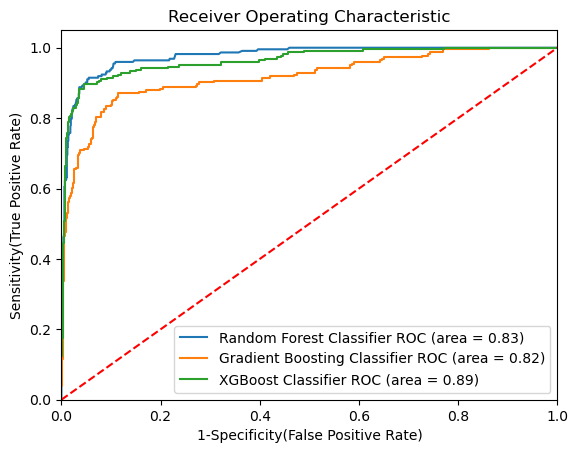

In [97]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
    'auc':  0.8325
},
{
    'label': 'Gradient Boosting Classifier',
    'model': GradientBoostingClassifier(n_estimators=1000,learning_rate=0.1,min_samples_split=8,loss='log_loss'),
    'auc':  0.8194
},
{
    'label': 'XGBoost Classifier',
    'model': XGBClassifier(n_estimators=1000,learning_rate=0.1,max_depth=15),
    'auc':  0.8894
}, 
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 